In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [3]:
wx = demo_model.get_weights()[0] # Weights at previous
wh = demo_model.get_weights()[1] # Weights at current
bh = demo_model.get_weights()[2] # Bias at current
wy = demo_model.get_weights()[3] # Weights at next
by = demo_model.get_weights()[4] # Bias at next
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[1.1716241  0.33752036]]  wh =  [[-0.29047847  0.9568816 ]
 [-0.9568816  -0.2904784 ]]  bh =  [0. 0.]  wy = [[ 0.09018111]
 [-1.0202693 ]] by =  [0.]


In [4]:
# Fit on Datapoints
x = np.array([1, 2, 3])

# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input) 

1/1 [==============================] - 0s 312ms/step


In [5]:
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by 

In [6]:
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

h1 =  [[1.17162406 0.33752036]] h2 =  [[1.67994955 1.69810383]] h3 =  [[1.40199874 2.12681137]]


In [7]:
print("Prediction from network ", y_pred_model)

Prediction from network  [[-2.0434864]]


In [8]:
print("Prediction from our computation ", o3)

Prediction from our computation  [[-2.04348649]]


In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

In [10]:
model = Sequential()
model.add(Embedding(10000,32))  # Legth 10000, 32 dim - One Hot Encoding
model.add(SimpleRNN(32)) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(Embedding(10000,32))  # Legth 10000, 32 dim - One Hot Encoding
model.add(SimpleRNN(32 ,return_sequences=True)) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000,32))  # Legth 10000, 32 dim - One Hot Encoding
model.add(SimpleRNN(32 ,return_sequences=True)) 
model.add(SimpleRNN(32 ,return_sequences=True)) 
model.add(SimpleRNN(32 ,return_sequences=True)) 
model.add(SimpleRNN(32)) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Review Classification using RNN

In [13]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [14]:
print('Loading Data....')
(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=10000)
print(len(input_train),'train sequences')
print(len(input_test),'test sequences')



Loading Data....
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [15]:
print('Pad Sequences (Samples x Time)')
input_train = sequence.pad_sequences(input_train,maxlen=500)
input_test = sequence.pad_sequences(input_test,maxlen=500)
print('Input Train Shape',input_train.shape)
print('Input Test Shape',input_test.shape)

Pad Sequences (Samples x Time)
Input Train Shape (25000, 500)
Input Test Shape (25000, 500)


In [16]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(10000,32))  # Legth 10000, 32 dim - One Hot Encoding
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 31s 191ms/step - loss: 0.6376 - accuracy: 0.6181 - val_loss: 0.5827 - val_accuracy: 0.6916
Epoch 2/10
157/157 [==============================] - 30s 189ms/step - loss: 0.4139 - accuracy: 0.8235 - val_loss: 0.4975 - val_accuracy: 0.7568
Epoch 3/10
157/157 [==============================] - 30s 189ms/step - loss: 0.3180 - accuracy: 0.8710 - val_loss: 0.3326 - val_accuracy: 0.8598
Epoch 4/10
157/157 [==============================] - 29s 188ms/step - loss: 0.2537 - accuracy: 0.9000 - val_loss: 0.3511 - val_accuracy: 0.8566
Epoch 5/10
157/157 [==============================] - 30s 189ms/step - loss: 0.2002 - accuracy: 0.9258 - val_loss: 0.3814 - val_accuracy: 0.8638
Epoch 6/10
157/157 [==============================] - 30s 191ms/step - loss: 0.1526 - accuracy: 0.9435 - val_loss: 0.4156 - val_accuracy: 0.8578
Epoch 7/10
157/157 [==============================] - 30s 190ms/step - loss: 0.1348 - accuracy: 0.9546 - val_loss: 0.4256 - val_ac

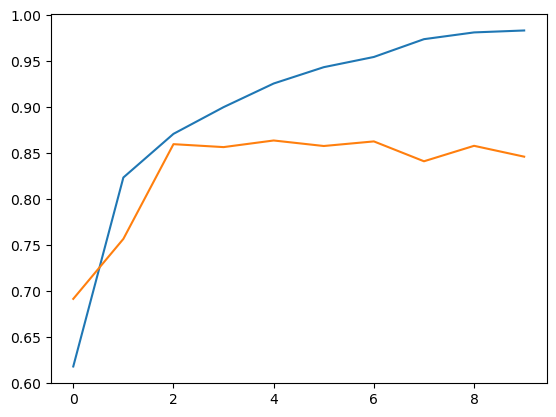

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


Val accuraccy not good.

Not good for long sequences

**Implementing the Same in LSTM**

In [18]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000,32))  # Legth 10000, 32 dim - One Hot Encoding
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

hist = model.fit(input_train,y_train,epochs=5,batch_size=128,validation_split=0.2)


Epoch 1/5
157/157 [==============================] - 58s 358ms/step - loss: 0.5774 - acc: 0.6888 - val_loss: 0.4150 - val_acc: 0.8262
Epoch 2/5
157/157 [==============================] - 55s 351ms/step - loss: 0.3496 - acc: 0.8569 - val_loss: 0.3139 - val_acc: 0.8724
Epoch 3/5
157/157 [==============================] - 55s 351ms/step - loss: 0.2699 - acc: 0.8975 - val_loss: 0.2925 - val_acc: 0.8778
Epoch 4/5
157/157 [==============================] - 56s 355ms/step - loss: 0.2298 - acc: 0.9153 - val_loss: 0.3167 - val_acc: 0.8670
Epoch 5/5
157/157 [==============================] - 56s 354ms/step - loss: 0.2023 - acc: 0.9248 - val_loss: 0.2909 - val_acc: 0.8816
